In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.insert(0, os.path.abspath('../src'))
from shallowwater import (ModelParams, make_grid, setup_initial_state, wind_gyre_forcing,
                          run_model, compute_dt_cfl,animate_eta)
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Nx, Ny = 64, 64
Lx, Ly = 2.0e6, 2.0e6
grid = make_grid(Nx, Ny, Lx, Ly)
params = ModelParams(H=1000.0, g=9.81, rho=1025.0, f0=1e-4, beta=2e-11, y0=Ly/2, r=1/(20*86400), linear=True)
dt = compute_dt_cfl(grid, params, cfl=0.5)
tmax = 20 * 86400.0
ic_fn = lambda g, p: setup_initial_state(g, p, mode='rest')
forcing_fn = lambda t, g, p: wind_gyre_forcing(t, g, p, tau0=0.1)
out = run_model(tmax, dt, grid, params, forcing_fn, ic_fn, save_every=48, out_vars=('eta',))
print('Saved steps:', len(out['time']))


Saved steps: 229


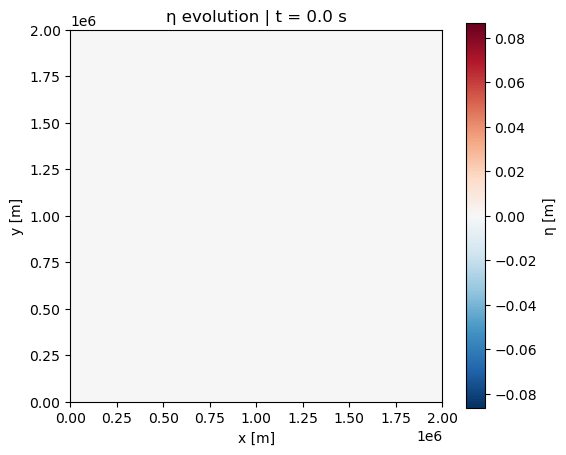

In [3]:
# Visualize eta(x,y,t) as an animation and display it inline
anim = animate_eta(out, grid, interval=120, title="η evolution")  # interval in ms

In [4]:
# Optionally save to a file:
# GIF (no external dependencies)
anim.save("eta_01.gif", fps=10)

# MP4 (requires ffmpeg available on your PATH)
# anim.save("eta.mp4", fps=20)

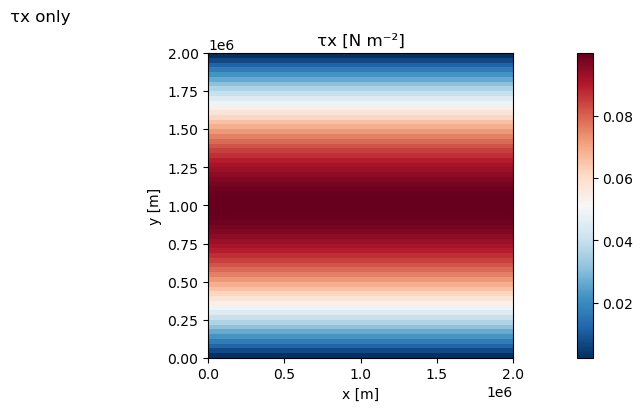

In [5]:
from shallowwater.visualize import plot_forcings

fig_tx = plot_forcings(forcing_fn, t=0.0, grid=grid, params=params, what="taux",
                       title="τx only")

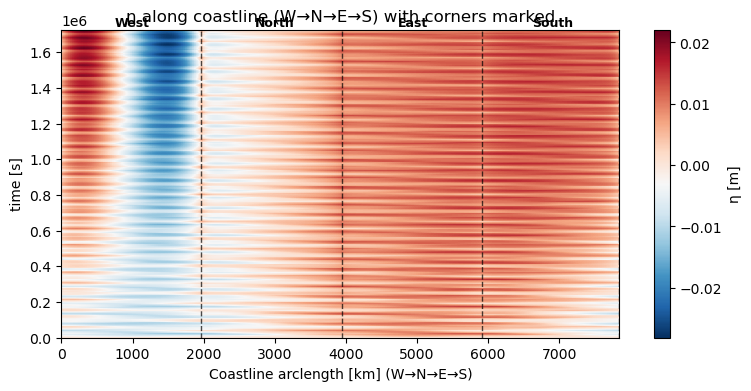

In [6]:
from shallowwater.visualize import coast_hovmoller

fig = coast_hovmoller(out, grid, units_x="km",
                      title="η along coastline (W→N→E→S) with corners marked")